# Introduction

Version control repositories like CVS, Subversion or Git can be a real gold mine for software developers. They contain every change to the source code including the date (the "when"), the responsible developer (the "who"), as well as a little message that describes the intention (the "what") of a change.

In this notebook, we will analyze the evolution of a very famous open-source project – the Linux kernel. The Linux kernel is the heart of some Linux distributions like Debian, Ubuntu or CentOS. Our dataset at hand contains the history of kernel development of almost 13 years (early 2005 - late 2017). We get some insights into the work of the development efforts by

identifying the TOP 10 contributors and
visualizing the commits over the years.

In [1]:
# Printing the contents of git_log_excerpt.csv
with open('git_log_excerpt.csv') as f:
    print(f.read())

# Reading in the dataset
The dataset was created by using the command git log --encoding=latin-1 --pretty="%at#%aN" in late 2017. The latin-1 encoded text output was saved in a header-less CSV file. In this file, each row is a commit entry with the following information:

timestamp: the time of the commit as a UNIX timestamp in seconds since 1970-01-01 00:00:00 (Git log placeholder "%at")
author: the name of the author that performed the commit (Git log placeholder "%aN")
The columns are separated by the number sign #. The complete dataset is a gz-compressed csv file named git_log.gz.

In [2]:
# Load pandas
import pandas as pd
# Read in log file
git_log = pd.read_csv('git_log.gz', 
                     sep='#',
                     header=None,
                     encoding='latin-1',
                     names=['timestamp', 'author'])
# Preview
git_log.head()

,timestamp,author
0,1502826583,Linus Torvalds
1,1501749089,Adrian Hunter
2,1501749088,Adrian Hunter
3,1501882480,Kees Cook
4,1497271395,Rob Clark


# Getting an overview
The dataset contains the information about every single code contribution (a "commit") to the Linux kernel over the last 13 years. We'll first take a look at the number of authors and their commits to the repository.

In [3]:
# Calculate the number of commits 
number_of_commits = len(git_log)

# Calculate the number of authors
number_of_authors = len(git_log['author'].dropna().unique())

# Print result
print("{} authors commited {} code changes".format(number_of_authors, number_of_commits))

17385 authors commited 699071 code changes


# Finding the TOP 10 contributors
There are some very important people that changed the Linux kernel very often. To see if there are any bottlenecks, we take a look at the TOP 10 authors with the most commits.

In [4]:
# Identify the top 10 authors
top_10_authors  = git_log['author'].value_counts().head(10)

top_10_authors

Linus Torvalds           23361
David S. Miller           9106
Mark Brown                6802
Takashi Iwai              6209
Al Viro                   6006
H Hartley Sweeten         5938
Ingo Molnar               5344
Mauro Carvalho Chehab     5204
Arnd Bergmann             4890
Greg Kroah-Hartman        4580
Name: author, dtype: int64

# Wrangling the data
For our analysis, we want to visualize the contributions over time. For this, we use the information in the timestamp column to create a time series-based column.

In [5]:
# Convert timestamp column to Timestamp object
git_log['timestamp'] = pd.to_datetime(git_log['timestamp'], unit='s')

git_log['timestamp'].describe()

<ipython-input-5-3b82c2602aa5>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  git_log['timestamp'].describe()


count                  699071
unique                 668448
top       2008-09-04 05:30:19
freq                       99
first     1970-01-01 00:00:01
last      2037-04-25 08:08:26
Name: timestamp, dtype: object

# Treating wrong timestamps
As we can see from the results above, some contributors had their operating system's time incorrectly set when they committed to the repository. We'll clean up the timestamp column by dropping the rows with the incorrect timestamps.

In [6]:
# Calculate first real commit 
first_commit_timestamp = git_log.iloc[-1]['timestamp']

# Look at descending values
descending_values = git_log.sort_values('timestamp', ascending=False)
descending_values.head(10)

,timestamp,author
525658,2037-04-25 08:08:26,Daniel Vetter
589765,2030-08-14 07:56:40,"Zhang, Yanmin"
694191,2019-04-05 05:07:45,Len Brown
34060,2017-10-03 12:57:00,Michael Engl
0,2017-08-15 19:49:43,Linus Torvalds
73,2017-08-15 17:58:40,David S. Miller
87,2017-08-15 17:40:58,Catalin Marinas
110,2017-08-15 17:19:14,David S. Miller
121,2017-08-15 16:54:09,Thomas Tai
147,2017-08-15 16:07:52,Arnd Bergmann


In [9]:
# Near 2018 seems to be roughly the last commit in the dataset
last_commit_timestamp = pd.to_datetime('2018')

# Filter out wrong values
corrected_log = git_log[
    (git_log['timestamp']>=first_commit_timestamp)&
    (git_log['timestamp']<=last_commit_timestamp)
]

corrected_values.head()

,timestamp,author
0,2017-08-15 19:49:43,Linus Torvalds
1,2017-08-03 08:31:29,Adrian Hunter
2,2017-08-03 08:31:28,Adrian Hunter
3,2017-08-04 21:34:40,Kees Cook
4,2017-06-12 12:43:15,Rob Clark


# Grouping commits per year
To find out how the development activity has increased over time, we'll group the commits by year and count them up.

In [11]:
# Counting the no. of commits per year
commits_per_year = corrected_log.groupby(pd.Grouper(key='timestamp', freq='AS')).count()
commits_per_year.head()

,author
timestamp,
2005-01-01,16229
2006-01-01,29255
2007-01-01,33759
2008-01-01,48847
2009-01-01,52572


<AxesSubplot:title={'center':'Commits per year (Linux kernal)'}, xlabel='timestamp'>

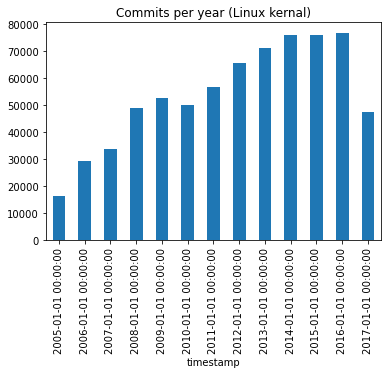

In [12]:
%matplotlib inline

# Plot data
commits_per_year.plot(kind='bar', title='Commits per year (Linux kernal)', legend=False)

# Conclusion
Thanks to the solid foundation and caretaking of Linux Torvalds, many other developers are now able to contribute to the Linux kernel as well. There is no decrease of development activity at sight!